<a href="https://colab.research.google.com/github/rht6226/BTP-DD/blob/main/Feature_Normalizaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import random

In [ ]:
BASE_DIR = '/content/drive/MyDrive/Drowsiness Detection/Extracted_Features/'
TARGET_DIR = '/content/drive/MyDrive/Drowsiness Detection/Normalized_Features/'

In [ ]:
def normalise(f, TARGET_DIR):
    f_path = BASE_DIR + f
    Data = np.load(f_path)

    # Load data into df
    df = pd.DataFrame(Data['features'], columns=['EAR', 'MAR', 'PUC', 'MOE'])
    df['Label'] = Data['labels']
    df_alert = df[df['Label'] == 0]

    # Calculate mean and std
    df_alert_mean = df_alert.mean()
    df_alert_std = df_alert.std()

    # Add columns to df
    df['EAR_MEAN'] = df_alert_mean["EAR"]
    df["MAR_MEAN"] = df_alert_mean["MAR"]
    df["PUC_MEAN"] = df_alert_mean["PUC"]
    df["MOE_MEAN"] = df_alert_mean["MOE"]
    df['EAR_STD'] = df_alert_std["EAR"]
    df["MAR_STD"] = df_alert_std["MAR"]
    df["PUC_STD"] = df_alert_std["PUC"]
    df["MOE_STD"] = df_alert_std["MOE"]

    # Calculate Normalised Features
    df['EAR_N'] = (df['EAR'] - df['EAR_MEAN']) / df['EAR_STD']
    df['MAR_N'] = (df['MAR'] - df['MAR_MEAN']) / df['MAR_STD']
    df['PUC_N'] = (df['PUC'] - df['PUC_MEAN']) / df['PUC_STD']
    df['MOE_N'] = (df['MOE'] - df['MOE_MEAN']) / df['MOE_STD']

    # Drop useless columns
    df = df.drop(['EAR_MEAN', 'MAR_MEAN', 'PUC_MEAN', 'MOE_MEAN', 'EAR_STD', 'MAR_STD', 'PUC_STD', 'MOE_STD'], axis=1)

    # Rearrange columns
    cols = df.columns.to_list()
    cols = cols[0:4] + cols[5:] + [cols[4]]
    df = df[cols]

    # save to csv
    df.to_csv(TARGET_DIR + '{}.csv'.format(f.split(".")[0]), index=False)

    return df

In [ ]:
files = os.listdir(BASE_DIR)
count = 0
for f in files:
    df = normalise(f, TARGET_DIR)
    count+=1
    print("Nomralised {}/{} : {}".format(count, len(files), f))
    print("Dataframe size = {}".format(df.shape))
    print()

Nomralised 1/35 : 01.npz
Dataframe size = (720, 9)

Nomralised 2/35 : 04.npz
Dataframe size = (720, 9)

Nomralised 3/35 : 06.npz
Dataframe size = (720, 9)

Nomralised 4/35 : 09.npz
Dataframe size = (720, 9)

Nomralised 5/35 : 11.npz
Dataframe size = (720, 9)

Nomralised 6/35 : 12.npz
Dataframe size = (720, 9)

Nomralised 7/35 : 15.npz
Dataframe size = (720, 9)

Nomralised 8/35 : 16.npz
Dataframe size = (720, 9)

Nomralised 9/35 : 17.npz
Dataframe size = (720, 9)

Nomralised 10/35 : 03.npz
Dataframe size = (495, 9)

Nomralised 11/35 : 59.npz
Dataframe size = (15, 9)

Nomralised 12/35 : 23.npz
Dataframe size = (720, 9)

Nomralised 13/35 : 55.npz
Dataframe size = (720, 9)

Nomralised 14/35 : 54.npz
Dataframe size = (720, 9)

Nomralised 15/35 : 24.npz
Dataframe size = (720, 9)

Nomralised 16/35 : 27.npz
Dataframe size = (720, 9)

Nomralised 17/35 : 26.npz
Dataframe size = (240, 9)

Nomralised 18/35 : 29.npz
Dataframe size = (720, 9)

Nomralised 19/35 : 18.npz
Dataframe size = (707, 9)

Nom

In [ ]:
# Divide files into train, test and validation set
files = os.listdir(TARGET_DIR);
random.shuffle(files);
train = files[:28]
test = files[28:]

In [ ]:
def process_dataset(Df):
    
    # Dropping rows with Lbael = 5
    index_names = Df[ Df['Label'] == 5 ].index
    Df = Df.drop(index_names, inplace=False) 
    
    
    # Renaming all the labels
    Df.loc[Df['Label'] == 10, 'Label'] = 1
    Df.loc[Df['Label'] == 101, 'Label'] = 1
    Df.loc[Df['Label'] == 102, 'Label'] = 1 

    return Df

In [ ]:
train_all = []
for f in train:
    df = pd.read_csv(TARGET_DIR + f)
    train_all.append(df)

train_all = pd.concat(train_all, ignore_index=True)
train_all = process_dataset(train_all)

train_all

,EAR,MAR,PUC,MOE,EAR_N,MAR_N,PUC_N,MOE_N,Label
240,0.333333,1.717911,0.471232,5.153734,5.857175,35.045910,3.769626,2.489660,1
241,0.277707,0.945467,0.468123,3.404550,2.728539,-1.745968,3.649509,-2.673563,1
242,0.279457,0.955662,0.475169,3.419713,2.826969,-1.260352,3.921788,-2.628807,1
243,0.274776,0.916041,0.456964,3.333771,2.563714,-3.147529,3.218254,-2.882489,1
244,0.281137,0.941984,0.461040,3.350618,2.921491,-1.911843,3.375790,-2.832760,1
...,...,...,...,...,...,...,...,...,...
17461,0.291197,1.107719,0.437048,3.804013,0.494236,0.830278,0.258366,-0.039194,0
17462,0.313541,1.131945,0.489979,3.610201,1.013477,1.027460,1.343140,-0.263325,0
17463,0.286090,1.131945,0.427775,3.956601,0.375551,1.027460,0.068315,0.137263,0
17464,0.291197,1.107586,0.474362,3.803558,0.494236,0.829199,1.023080,-0.039721,0


In [ ]:
np.unique(train_all.Label.values)

array([0, 1])

In [ ]:
test_all = []
for f in test:
    df = pd.read_csv(TARGET_DIR + f)
    test_all.append(df)

test_all = pd.concat(test_all, ignore_index=True)
test_all = process_dataset(test_all)

test_all

,EAR,MAR,PUC,MOE,EAR_N,MAR_N,PUC_N,MOE_N,Label
0,0.311196,1.106627,0.481150,3.556042,-0.474072,-1.701950,-0.619316,-0.216636,1
1,0.326950,1.179309,0.514528,3.607000,-0.097285,-0.347627,0.053330,-0.132636,1
2,0.301773,1.308314,0.502575,4.335430,-0.699456,2.056189,-0.187561,1.068129,1
3,0.340194,1.278175,0.545326,3.757200,0.219460,1.494600,0.673986,0.114958,1
4,0.359488,1.260782,0.557191,3.507164,0.680918,1.170503,0.913101,-0.297209,1
...,...,...,...,...,...,...,...,...,...
4810,0.395285,0.912343,0.605583,2.308066,0.236865,-0.479292,0.924340,-0.448760,0
4811,0.381439,0.912343,0.556562,2.391845,-0.095927,-0.479292,0.070194,-0.301171,0
4812,0.381439,0.907256,0.556562,2.378508,-0.095927,-0.520724,0.070194,-0.324666,0
4813,0.383440,0.878220,0.563281,2.290373,-0.047834,-0.757198,0.187277,-0.479929,0


In [ ]:
np.unique(test_all.Label.values)

array([0, 1, 2])

In [ ]:
SAVE_PATH = '/content/drive/MyDrive/Drowsiness Detection/Processed_Features/'

In [ ]:
train_all.to_csv(SAVE_PATH + 'train.csv', index=False)
test_all.to_csv(SAVE_PATH + 'test.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

def pie_chart(sizes, title):
    labels = ['Alert', 'Drowsy']
    explode = (0, 0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title(title)
    plt.show() 

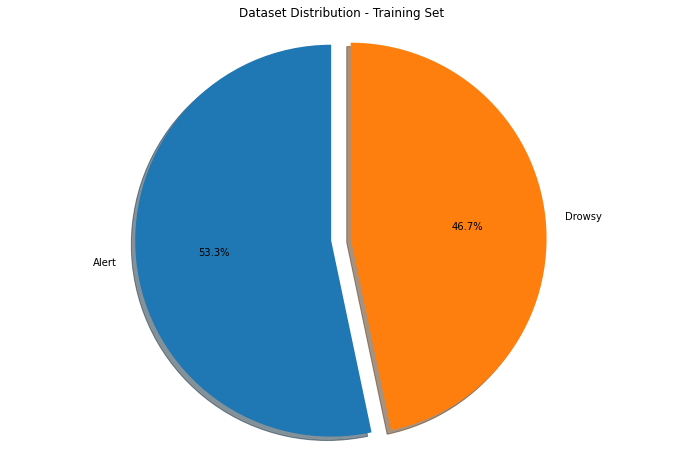

In [ ]:
# now loading data from csv files and checking
train_all = pd.read_csv(SAVE_PATH + 'train.csv')
alert_count = len(train_all[train_all['Label'] == 0])
drowsy_count = len(train_all[train_all['Label'] == 1])
pie_chart([alert_count, drowsy_count], title='Dataset Distribution - Training Set') 

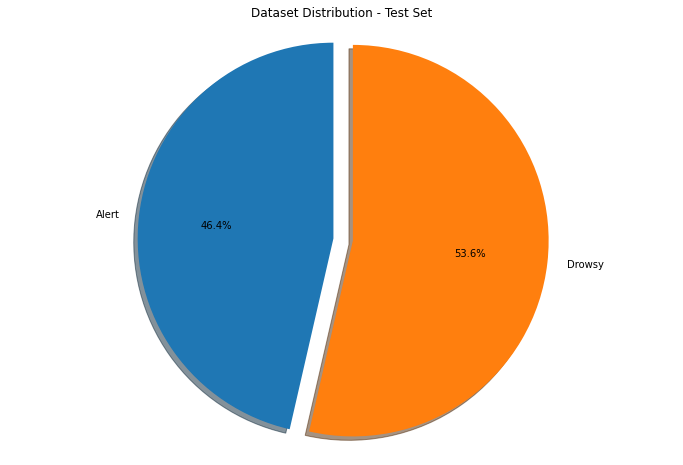

In [ ]:
test_all = pd.read_csv(SAVE_PATH + 'test.csv')
alert_count = len(test_all[test_all['Label'] == 0])
drowsy_count = len(test_all[test_all['Label'] == 1])
pie_chart([alert_count, drowsy_count], title='Dataset Distribution - Test Set') 